In [2]:
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
from pocket_coffea.parameters import defaults

from hist import Hist

import sys


matplotlib.rcParams["figure.dpi"] = 300


/t3home/mmalucch/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [3]:
prefix =  str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)

input = prefix + "out_parton_matching_lastB_fulldataset/output_all.coffea"
o = load(f"{input}")
col = o["columns"]["GluGlutoHHto4B"][
    "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018"
]["baseline"]
print(o["cutflow"])
for k in col.keys():
    col[k] = col[k].value#[col[k].value != -999]

{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': 7391383}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': 2935336}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': 648550}, 'baseline': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2018': {'GluGlutoHHto4B': 648550}}}


In [4]:
print(col.keys())
for k in col.keys():
    print(k, col[k].shape)


dict_keys(['weight', 'bQuarkHiggsMatched_N', 'bQuarkHiggsMatched_provenance', 'bQuarkHiggsMatched_pdgId', 'bQuarkHiggsMatched_dRMatchedJet', 'bQuarkHiggsMatched_genPartIdxMother', 'bQuarkHiggsMatched_pt', 'bQuarkHiggsMatched_eta', 'bQuarkHiggsMatched_phi', 'bQuarkMatched_N', 'bQuarkMatched_provenance', 'bQuarkMatched_pdgId', 'bQuarkMatched_dRMatchedJet', 'bQuarkMatched_genPartIdxMother', 'bQuarkMatched_pt', 'bQuarkMatched_eta', 'bQuarkMatched_phi', 'bQuark_N', 'bQuark_provenance', 'bQuark_pdgId', 'bQuark_genPartIdxMother', 'bQuark_pt', 'bQuark_eta', 'bQuark_phi', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pdgId', 'JetGoodHiggsMatched_dRMatchedJet', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodHiggsMatched_ptPnetRegNeutrino', 'JetGoodHiggsMatched_hadronFlavour', 'JetGoodMatched_N', 'JetGoodMatched_provenance', 'JetGoodMatched_pdgId', 'JetGoodMatched_dRMatchedJet', 'JetGoodMat

In [5]:
print(len(col["JetGoodMatched_provenance"]))
print(ak.sum(col["JetGoodMatched_N"]))
print(len(col["JetGoodMatched_N"]))


jet_good_matched_provenance_unflat = ak.unflatten(
    col["JetGoodMatched_provenance"], col["JetGoodMatched_N"]
)
jet_good_matched_provenance_unflat_5jets=jet_good_matched_provenance_unflat[col["JetGoodMatched_N"]>=5]


3114080
3114080
648550


In [16]:
print(ak.sum(col["JetGoodHiggsMatched_N"]))
print(ak.sum(col["JetGoodMatched_N"]))
print(ak.sum(col["JetGood_N"]))
print((col["JetGoodMatched_provenance"][:6]))

2594200
3114080
3114080
[   2.    1.    2.    1. -999.    2.]


[[2, 1, 2, 1, -999], [2, 1, 1, 2, -999], ... 2, -999], [1, 2, 2, 1], [2, 2, 1, 1]]
[False, False, False, False, False, False, ... False, False, False, False, False]
[[1, 2, -999, 2, 1], [1, 1, 2, -999, ... [1, 2, 2, -999, 1, -999, -999, -999, -999]]
[[0.999, 0.999, -999, 0.915, 0.514], ... -999, 0.117, -999, -999, -999, -999]]
[[0.999, 0.999, 0.996, 0.915, 0.514], ... 0.117, 0.00813, 0.00627, 0.0043, 0.00254]]


<Array [[1, 0.999, 0.998, ... 0.703, 0.348]] type='648550 * var * float64'>

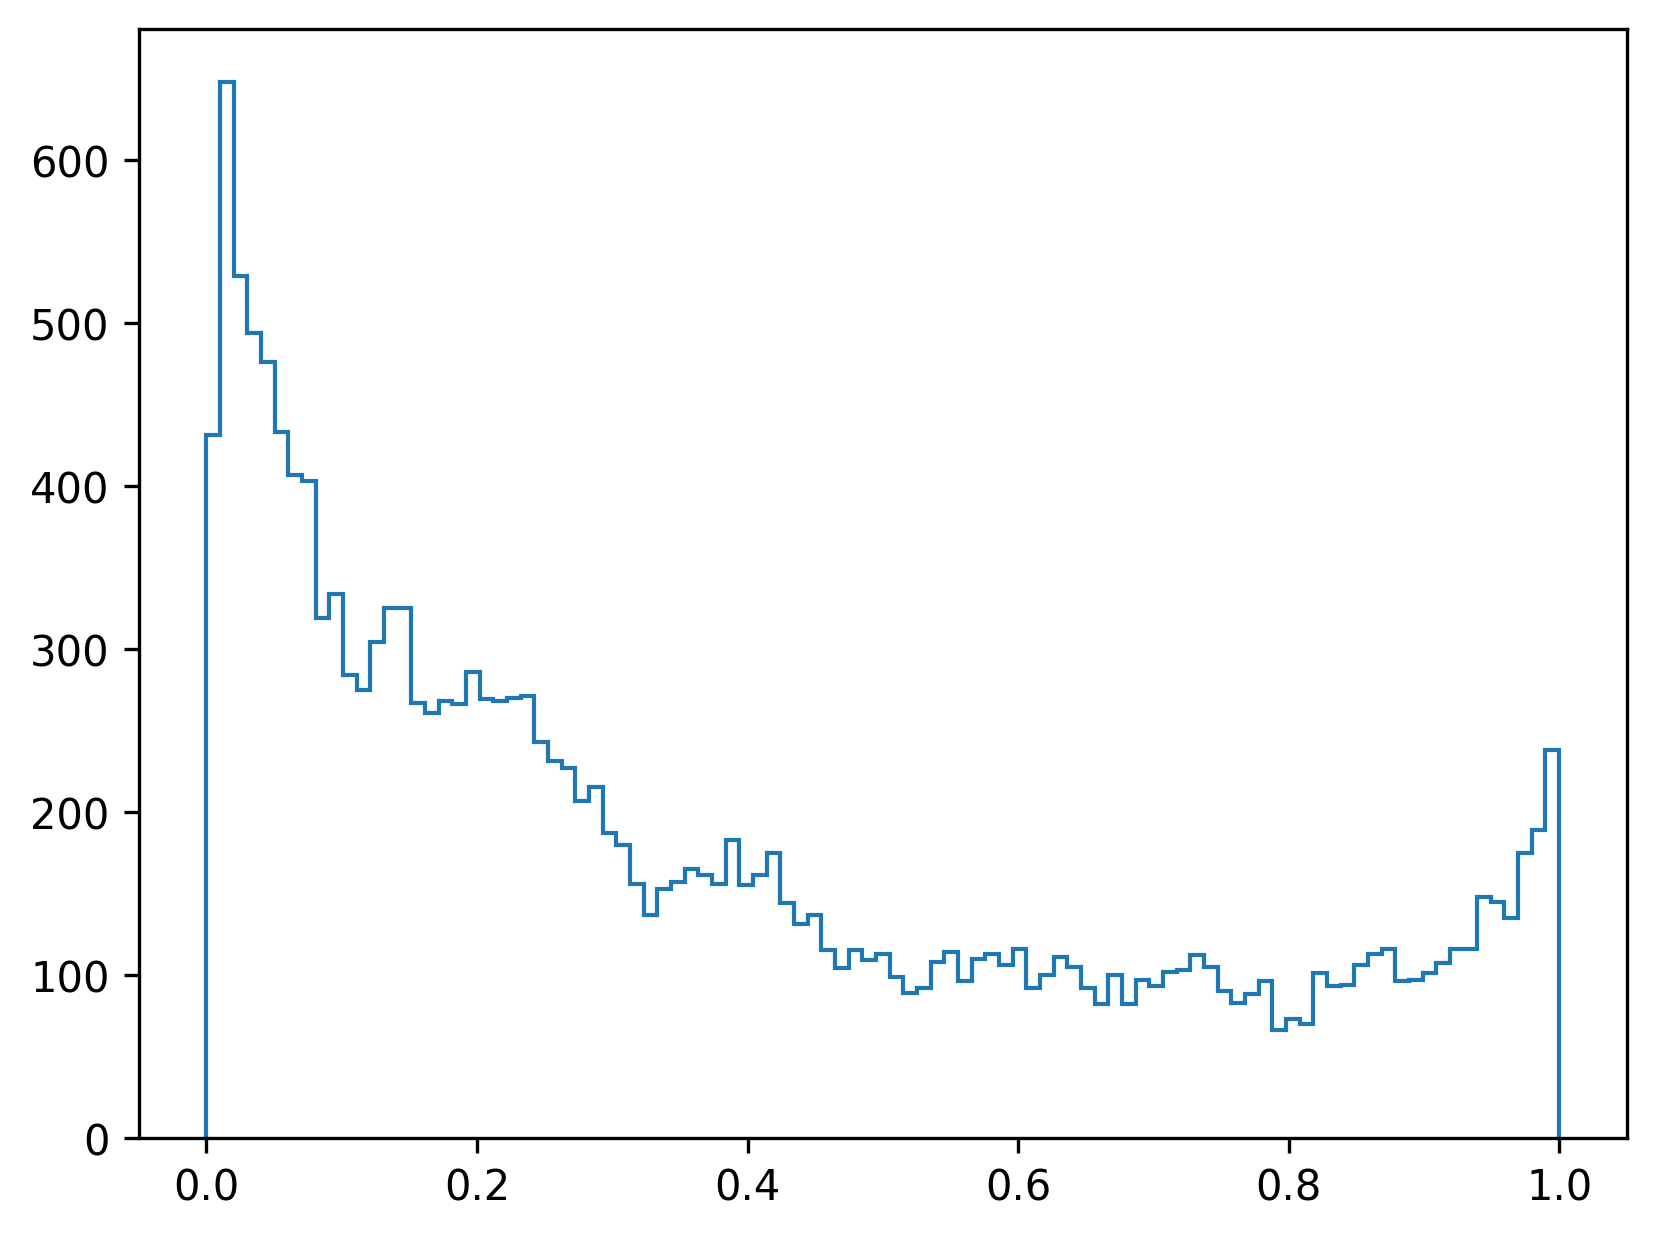

In [26]:
jet_good_matched_provenance_unflat = ak.unflatten(
    col["JetGoodMatched_provenance"], col["JetGoodMatched_N"]
)
print(jet_good_matched_provenance_unflat)
five_jets = col["JetGoodMatched_N"]>=5
mask_5_matched =jet_good_matched_provenance_unflat[five_jets][:,4] != -999.
print(mask_5_matched)
print(jet_good_matched_provenance_unflat[five_jets][mask_5_matched])


jet_good_matched_btag_unflat=ak.unflatten(col["JetGoodMatched_btagPNetB"], col["JetGoodMatched_N"])
jet_good_btag_unflat=ak.unflatten(col["JetGood_btagPNetB"], col["JetGoodMatched_N"])
print(jet_good_matched_btag_unflat[five_jets][mask_5_matched])
print(jet_good_btag_unflat[five_jets][mask_5_matched])
plt.hist(jet_good_matched_btag_unflat[five_jets][mask_5_matched][:,4], bins=np.linspace(0,1,100), histtype="step", label="matched")

jet_good_matched_btag_unflat